# Zestaw zadań: Rozwiązywanie równań nieliniowych
## Zadanie 2
### Autor: Artur Gęsiarz

In [592]:
import numpy as np
import matplotlib.pyplot as plt

### Dane rownanie

In [593]:
def f(x):
    return x ** 2 - 3 * x + 2

### Schematy iteracyjne

In [594]:
def g1(x):
    return (x ** 2 + 2) / 3

In [595]:
def g2(x):
    return np.sqrt(3 * x - 2)

In [596]:
def g3(x):
    return 3 - 2 / x

In [597]:
def g4(x):
    return (x ** 2 - 2) / (2 * x - 3) if 2 * x - 3 != 0 else 1000000

### Pochodne schematow iteracyjnych

In [598]:
def g1_prime(x):
    return 2 * x / 3

In [599]:
def g2_prime(x):
    return 3 / (2 * np.sqrt(3 * x - 2))

In [600]:
def g3_prime(x):
    return 2 / x ** 2

In [601]:
def g4_prime(x):
    return ( 2 * x * (2 * x - 3) - (x ** 2 - 2) * 2 ) / (2 * x - 3) ** 2

### Badanie zbieznosci oraz rzedu schematu iteracyjnego odpowiadajacych funkcja $g_i(x)$ dla pierwiastka $x = 2$ badajac $| g_i'(2)|$

In [602]:
x_value = 2

derivatives = {
    'g1': np.abs(g1_prime(x_value)),
    'g2': np.abs(g2_prime(x_value)),
    'g3': np.abs(g3_prime(x_value)),
    'g4': np.abs(g4_prime(x_value))
}

print(g4(1.5))

1000000


### Analiza zbieznosci oraz rzedu zbieznosci danych schematow iteracyjnych

In [603]:
for name, der in derivatives.items():
    if der < 1:
        print(f"Funkcja {name}(x) jest zbieżna.")
        print(f"Rząd zbieżności dla funkcji {name}(x): 1")
    else:
        print(f"Funkcja {name}(x) jest rozbieżna.")
    print("\n")

Funkcja g1(x) jest rozbieżna.


Funkcja g2(x) jest zbieżna.
Rząd zbieżności dla funkcji g2(x): 1


Funkcja g3(x) jest zbieżna.
Rząd zbieżności dla funkcji g3(x): 1


Funkcja g4(x) jest zbieżna.
Rząd zbieżności dla funkcji g4(x): 1




### Potwierdzenie analizy teoretycznej - weryfikujac ich zbieznosc lub brak

#### Z analizy teoretycznej wychodzi ze zbieznymi są tylko funkcje: $g_2(x), g_3(x), g_4(x)$

In [604]:
def iterate(g,x_0, n = 10):
    x = x_0
    errors = []

    for i in range(n):
        x = g(x)
        error = np.abs(x - 2)
        errors.append(error)
        print(f"Iteracja {i+1}: x = {x}, błąd = {error}")

    return errors

In [605]:
# Poczatkowa wartosc x
x0 = 1.5

# Wykonanie iteracji dla każdego schematu iteracyjnego
print("Schemat iteracyjny g1(x):")
errors_g1 = iterate(g1, x0)

print("\nSchemat iteracyjny g2(x):")
errors_g2 = iterate(g2, x0)

print("\nSchemat iteracyjny g3(x):")
errors_g3 = iterate(g3, x0)

print("\nSchemat iteracyjny g4(x):")
errors_g4 = iterate(g4, x0)

Schemat iteracyjny g1(x):
Iteracja 1: x = 1.4166666666666667, błąd = 0.5833333333333333
Iteracja 2: x = 1.3356481481481481, błąd = 0.6643518518518519
Iteracja 3: x = 1.2613186585505258, błąd = 0.7386813414494742
Iteracja 4: x = 1.1969749194692325, błąd = 0.8030250805307675
Iteracja 5: x = 1.1442496526127919, błąd = 0.8557503473872081
Iteracja 6: x = 1.1031024225014983, błąd = 0.8968975774985017
Iteracja 7: x = 1.0722783181762248, błąd = 0.9277216818237752
Iteracja 8: x = 1.049926930543611, błąd = 0.950073069456389
Iteracja 9: x = 1.0341155198269094, błąd = 0.9658844801730906
Iteracja 10: x = 1.0231316361156264, błąd = 0.9768683638843736

Schemat iteracyjny g2(x):
Iteracja 1: x = 1.5811388300841898, błąd = 0.41886116991581024
Iteracja 2: x = 1.6563262028515304, błąd = 0.3436737971484696
Iteracja 3: x = 1.7230724327649698, błąd = 0.2769275672350302
Iteracja 4: x = 1.7802295633695417, błąd = 0.21977043663045825
Iteracja 5: x = 1.827755095768748, błąd = 0.17224490423125194
Iteracja 6: x = 

### Wyznaczenie eksperymentalne rzędu zbieżnosci kazdej metody ze wzoru
### $ r = ln(e_k / e_{k+1} ) / ln( e_{k-1} /  e_k )  $

### Funkcja do obliczenia rzedu zbieznosci

In [606]:
def calculate_convergence_order(errors):
    orders = []
    for k in range(1, len(errors) - 1):
        order = np.log(errors[k] / errors[k+1]) / np.log(errors[k-1] / errors[k])
        orders.append(order)
    return orders

### Wyznaczenie zbieznosci

In [607]:
orders_g1 = calculate_convergence_order(errors_g1)
orders_g2 = calculate_convergence_order(errors_g2)
orders_g3 = calculate_convergence_order(errors_g3)
orders_g4 = calculate_convergence_order(errors_g4)

In [608]:
print("\nRzędy zbieżności:")
print(f"g1(x): {orders_g1}. \n")
print(f"g2(x): {orders_g2}. \n")
print(f"g3(x): {orders_g3}. \n")
print(f"g4(x): {orders_g4}. \n")


Rzędy zbieżności:
g1(x): [0.8154722651876818, 0.7875115990170751, 0.7614134703602331, 0.7384961158003329, 0.7195049696611229, 0.7045589738327053, 0.6932944369824237, 0.685091222928104]. 

g2(x): [1.0914363854492652, 1.0705552608769529, 1.0540451754758828, 1.0411736230196658, 1.0312413674819365, 1.0236344532452626, 1.0178402943271734, 1.0134445813721185]. 

g3(x): [1.150660103087122, 1.0820061166680355, 1.0429338568841264, 1.0219894741067412, 1.0111309218184965, 1.0056002411853684, 1.0028089101408417, 1.0014066644436643]. 

g4(x): [1.0000007213486228, 1.0000014426972876, 1.0000028853947405, 1.0000057707901424, 1.00001154158293, 1.0000230831764385, 1.000046166395178, 1.0000923329594438]. 



### Wykres błedu wzglednego dla kazdej metody w zaleznosci od numery iteracji

In [609]:
iterations = 10

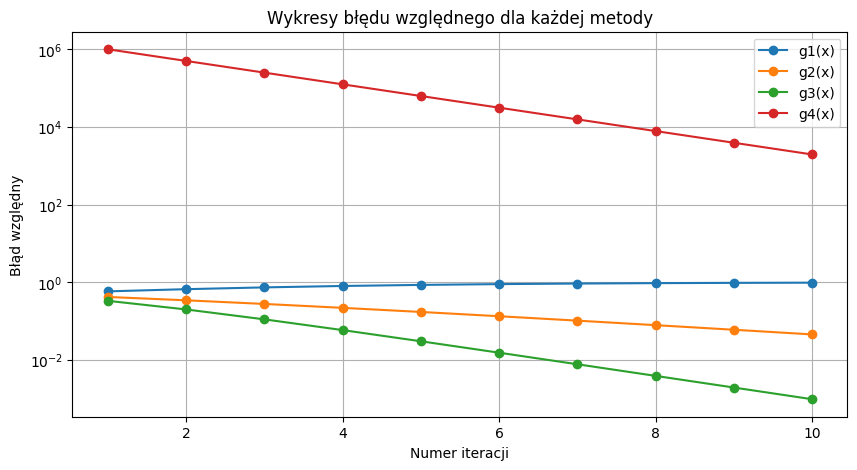

In [610]:
plt.figure(figsize=(10, 5))
plt.semilogy(range(1, iterations+1), errors_g1, marker='o', label='g1(x)')
plt.semilogy(range(1, iterations+1), errors_g2, marker='o', label='g2(x)')
plt.semilogy(range(1, iterations+1), errors_g3, marker='o', label='g3(x)')
plt.semilogy(range(1, iterations+1), errors_g4, marker='o', label='g4(x)')
plt.title('Wykresy błędu względnego dla każdej metody')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Wykres bledu wzglednego, ale tylko dla metod zbieznych

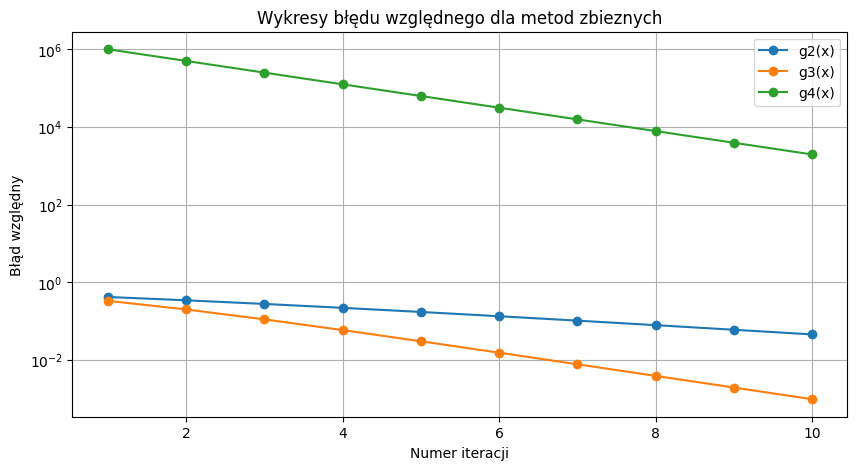

In [611]:
plt.figure(figsize=(10, 5))
plt.semilogy(range(1, iterations+1), errors_g2, marker='o', label='g2(x)')
plt.semilogy(range(1, iterations+1), errors_g3, marker='o', label='g3(x)')
plt.semilogy(range(1, iterations+1), errors_g4, marker='o', label='g4(x)')
plt.title('Wykresy błędu względnego dla metod zbieznych')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()